#LIBERARIES
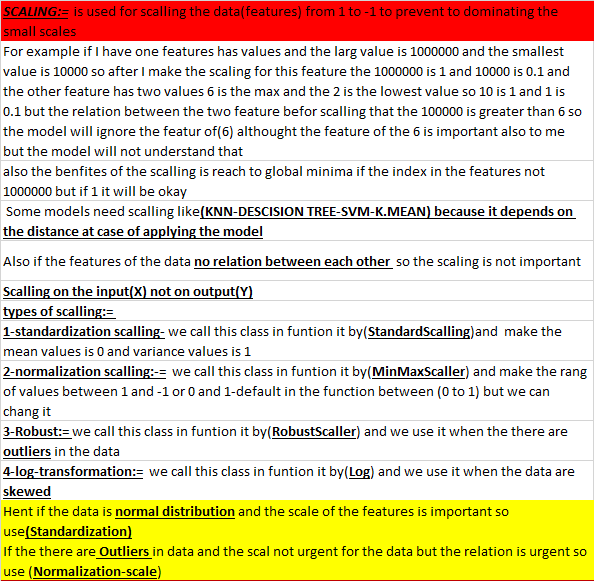

In [45]:
#---------------------------------------------------------------------------------------------->NUMPY
import numpy as np
#---------------------------------------------------------------------------------------------->PANDA
import pandas as pd
#---------------------------------------------------------------------------------------------->PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#---------------------------------------------------------------------------------------------->GRID_SEARCH
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------------------->SCORE_FOR_REGRESSION
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
#---------------------------------------------------------------------------------------------->SPLITTING_DATA
from sklearn.model_selection import train_test_split
#---------------------------------------------------------------------------------------------->SCALER(MinMaxScaler, StandardScaler,PowerTransformer,RobustScaler)
from sklearn.preprocessing import MinMaxScaler, StandardScaler,PowerTransformer,RobustScaler
#---------------------------------------------------------------------------------------------->ENCODING(LabelEncoder,OrdinalEncoder,OrdinalEncoder)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OrdinalEncoder
#---------------------------------------------------------------------------------------------->REGRESSION_MODELS(XGBRegressor,LinearRegression)
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import missingno as msng
#---------------------------------------------------------------------------------------------->EXCEPTION_WARNING
import warnings
warnings.filterwarnings("ignore")

#LOAD_DATA

In [46]:
df = pd.read_csv('/content/insurance-data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

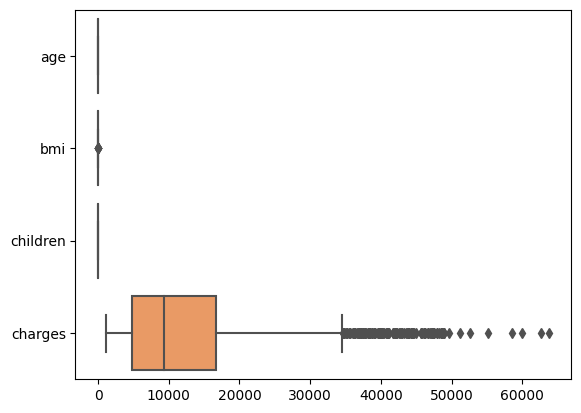

In [47]:
sns.boxplot(data=df,palette='rainbow',orient='h')

#ENCODING

In [48]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [49]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [50]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [51]:
ENCODING_MAP = {'yes': 1,'no':0}
df['smoker'] = [ENCODING_MAP[i] for i in df['smoker']]

In [52]:
ENCODING_MAP = {'female': 1,'male':0}
df['sex'] = [ENCODING_MAP[i] for i in df['sex']]

In [53]:
df_dummies = pd.get_dummies(df['region'],drop_first=True, prefix='region')
new_df = pd.concat([df, df_dummies], axis=1)
new_df.drop(['region'],axis=1,inplace=True)

In [54]:
new_df['smoker'].unique()

array([1, 0])

In [55]:
new_df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0
1334,18,1,31.920,0,0,2205.98080,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,1


#SPLITTING_DATA

In [56]:
x=new_df.loc[:,new_df.columns != 'charges']
y=new_df['charges']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

#LINEAR_REGRESSION

In [58]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result = G_L_REG.fit(x_train, y_train)
print(grid_result.best_params_)

{'fit_intercept': True, 'positive': True}


In [59]:
        y_pred_test_L_N=grid_result.predict(x_test)
        score_test_L_N=r2_score(y_test,y_pred_test_L_N)*100
        print("score_test_L_N for our testing dataset with tuning is : {:.2f}%".format(score_test_L_N))

score_test_L_N for our testing dataset with tuning is : 78.14%


In [60]:
new_df['charges'] = np.log10(new_df['charges'])
new_df['bmi'] = np.log10(new_df['bmi'])

#SPLITTING_DATA

In [61]:
x=new_df.loc[:,new_df.columns != 'charges']
y=new_df['charges']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

#STANDARD_SCALLER

In [63]:
ST_SCALER=StandardScaler()
x_train_sc=ST_SCALER.fit_transform(x_train)
x_test_sc=ST_SCALER.transform(x_test)

In [64]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result_SC= G_L_REG.fit(x_train_sc,y_train)
print(grid_result_SC.best_params_)

{'fit_intercept': True, 'positive': False}


In [65]:
        y_pred_test_L_SS=grid_result_SC.predict(x_test_sc)
        score_test_L_SS=r2_score(y_test,y_pred_test_L_SS)*100
        print("score_test_L_SS for our testing dataset with tuning is : {:.2f}%".format(score_test_L_SS))

score_test_L_SS for our testing dataset with tuning is : 80.50%


#MIN_MAX_SCALER

In [66]:
MM_SCALER=MinMaxScaler(feature_range=(-1,1))
x_train_mm=MM_SCALER.fit_transform(x_train)
x_test_mm=ST_SCALER.transform(x_test)

In [67]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result_MM= G_L_REG.fit(x_train_mm,y_train)
print(grid_result_MM.best_params_)

{'fit_intercept': True, 'positive': False}


In [68]:
        y_pred_test_L_MM=grid_result_MM.predict(x_test_mm)
        score_test_L_MM=r2_score(y_test,y_pred_test_L_MM)*100
        print("score_test_L_MM for our testing dataset with tuning is : {:.2f}%".format(score_test_L_MM))

score_test_L_MM for our testing dataset with tuning is : 26.67%


#POWER_TRANFORMER

In [69]:
PT_SCALER=PowerTransformer()
x_train_pt=PT_SCALER.fit_transform(x_train)
x_test_pt=ST_SCALER.transform(x_test)

In [70]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result_PT= G_L_REG.fit(x_train_pt,y_train)
print(grid_result_PT.best_params_)

{'fit_intercept': True, 'positive': False}


In [71]:
        y_pred_test_L_PT=grid_result_PT.predict(x_test_pt)
        score_test_L_PT=r2_score(y_test,y_pred_test_L_PT)*100
        print("score_test_L_PT for our testing dataset with tuning is : {:.2f}%".format(score_test_L_PT))

score_test_L_PT for our testing dataset with tuning is : 80.42%


In [72]:
RobustScaler(unit_variance=True)

RobustScaler(unit_variance=True)

#ROBUST_SCALER

In [73]:
RS_SCALER=RobustScaler(unit_variance=True)
x_train_rs=RS_SCALER.fit_transform(x_train)
x_test_rs=ST_SCALER.transform(x_test)

In [74]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result_RS= G_L_REG.fit(x_train_rs,y_train)
print(grid_result_RS.best_params_)

{'fit_intercept': True, 'positive': False}


In [75]:
        y_pred_test_L_RS=grid_result_RS.predict(x_test_rs)
        score_test_L_RS=r2_score(y_test,y_pred_test_L_RS)*100
        print("score_test_L_RS for our testing dataset with tuning is : {:.2f}%".format(score_test_L_RS))

score_test_L_RS for our testing dataset with tuning is : 42.58%


#FINAL_RESULTS_PLOTTING

Text(0.5, 1.0, 'R2 Score for LIN_REGRESSION')

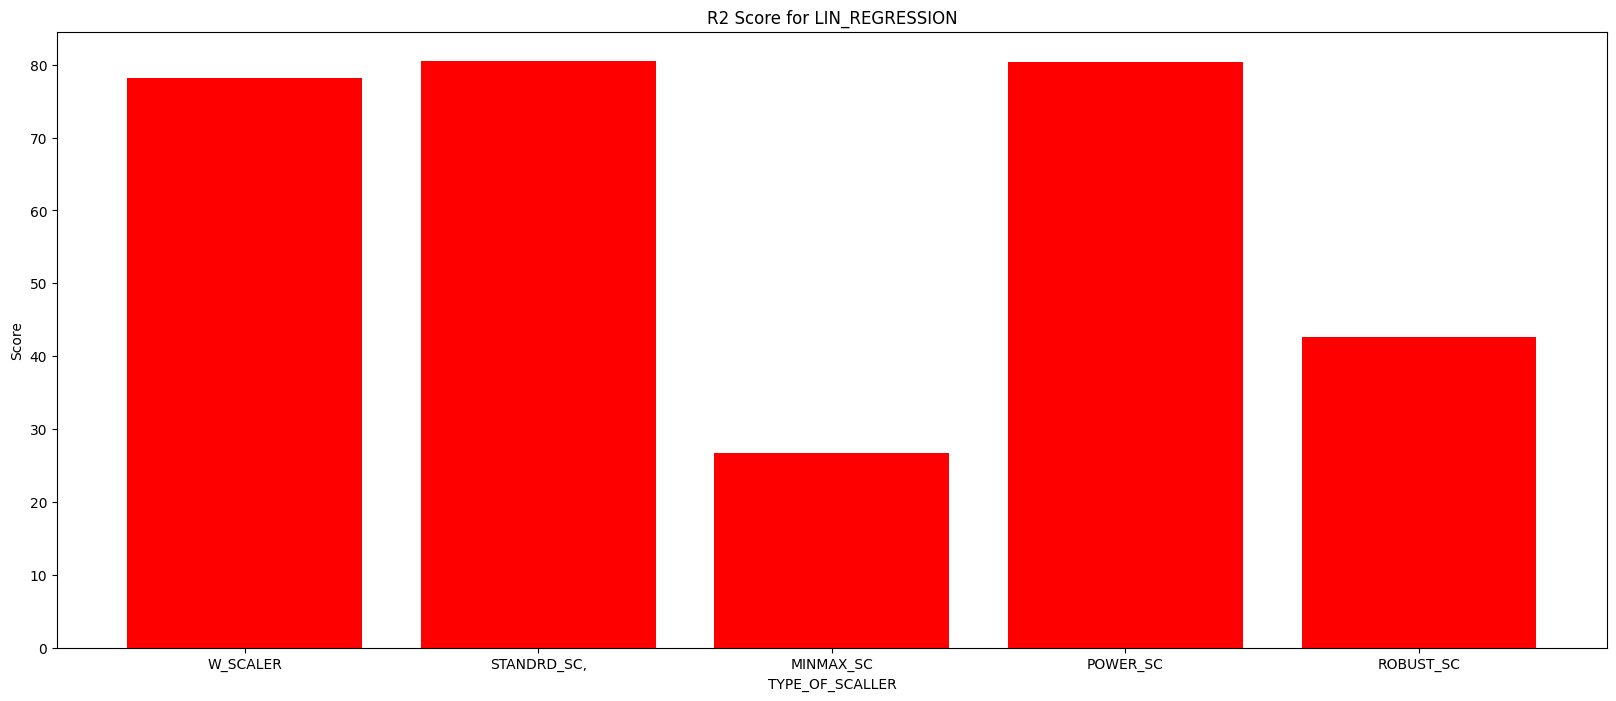

In [76]:
X= ["W_SCALER","STANDRD_SC,","MINMAX_SC","POWER_SC","ROBUST_SC"]
Y=[score_test_L_N,score_test_L_SS ,score_test_L_MM,score_test_L_PT,score_test_L_RS]
plt.figure(figsize=(20,8))
plt.bar(X , Y,color='RED')
plt.xlabel("TYPE_OF_SCALLER")
plt.ylabel("Score")
plt.title("R2 Score for LIN_REGRESSION")

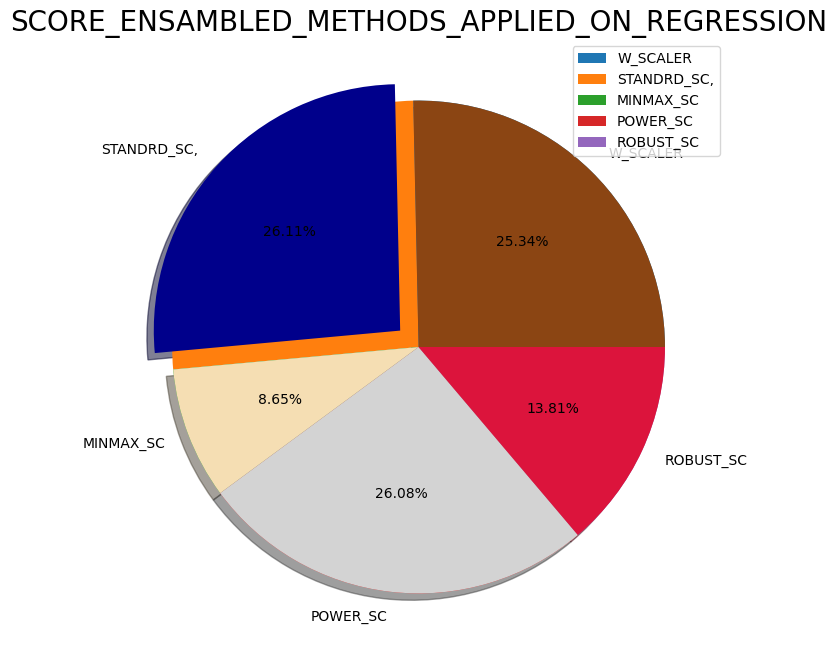

In [77]:
X= ["W_SCALER","STANDRD_SC","MINMAX_SC","POWER_SC","ROBUST_SC"]
DATA=[78.13847663232774,80.4960462135333,26.667672298212164,80.41628269649026,42.58242375294199]
colors = ['saddlebrown', 'darkblue', 'wheat', 'lightgrey','crimson']
EXPLOD = [0.0, 0.1, 0.0, 0.0,0.0]
plt.figure(figsize=(50, 8))
plt.pie(DATA)
plt.title("SCORE_ENSAMBLED_METHODS_APPLIED_ON_REGRESSION", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()